In [174]:
%pip install squarify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [175]:
shop=pd.read_csv("/Users/himanshuchandela/Documents/vcode/shopping idt./shopping_trends_updated.csv")

In [176]:
shop.shape

(3900, 18)

In [177]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [178]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [179]:
#checking all the null values in data set 
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [180]:
shop_dup = shop[shop.duplicated()]
shop_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [181]:
print(shop['Gender'].unique())
print(shop['Category'].unique())
print(shop['Size'].unique ())
print(shop['Subscription Status'].unique())
print(shop['Shipping Type'].unique())
print(shop['Discount Applied'].unique())
print(shop['Promo Code Used'].unique())
print(shop['Payment Method'].unique())

['Male' 'Female']
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
['L' 'S' 'M' 'XL']
['Yes' 'No']
['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
['Yes' 'No']
['Yes' 'No']
['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [182]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [183]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [184]:
shop['Age_category'] = pd.cut(
    shop['Age'], 
    bins=[0, 15, 18, 30, 50, 70], 
    labels=['child', 'teen', 'Young Adults', 'Middle-Aged Adults', 'old']
)


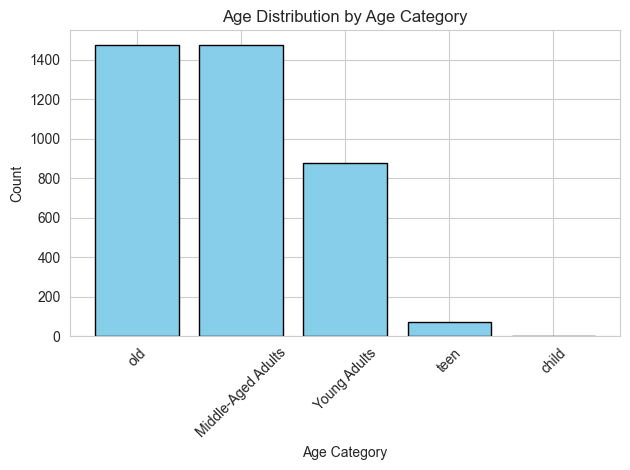

In [185]:
shop['Age_category'] = pd.cut(
    shop['Age'], 
    bins=[0, 15, 18, 30, 50, 70], 
    labels=['child', 'teen', 'Young Adults', 'Middle-Aged Adults', 'old']
)


age_category_counts = shop['Age_category'].value_counts()


plt.bar(age_category_counts.index, age_category_counts.values, color='skyblue', edgecolor='black')

plt.title('Age Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


Age Distribution by Age Category

In [186]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [187]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

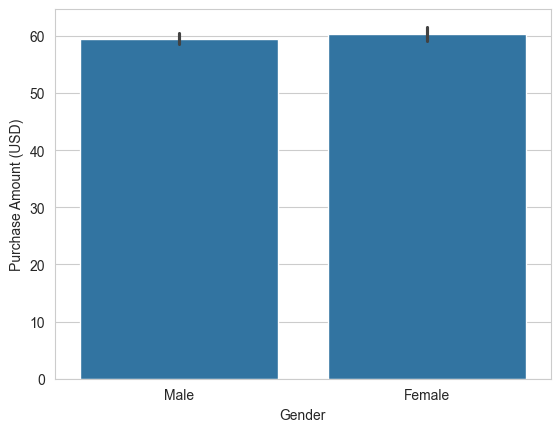

In [188]:
sns.barplot(shop, x='Gender', y='Purchase Amount (USD)')


Purchase Amount by Gender

In [189]:
shop.groupby ('Category' )['Item Purchased'].value_counts ()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [190]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

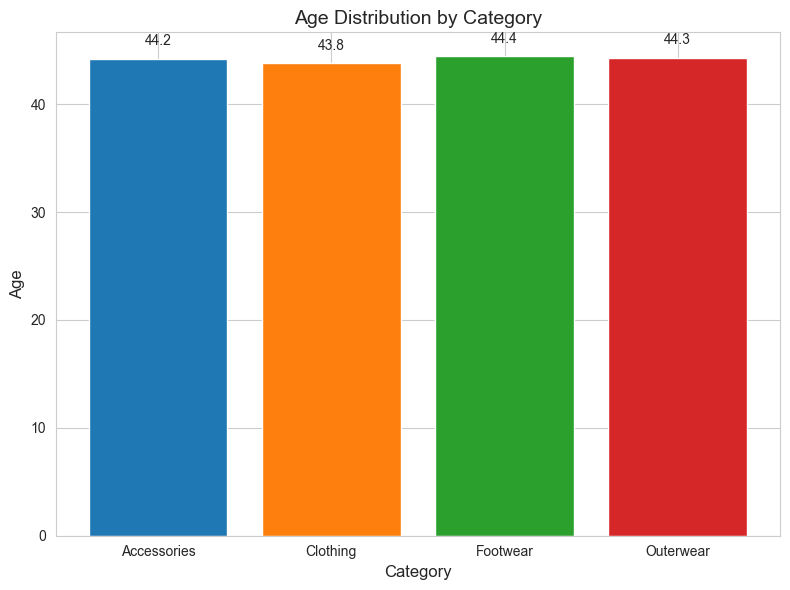

In [191]:
category_group = shop_group.groupby('Category').mean().reset_index()

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10.colors[:len(category_group)]

bars = plt.bar(category_group['Category'], category_group['Age'], color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 1, 
        f'{yval:.1f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )


plt.title("Age Distribution by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.tight_layout()
plt.show()

Age Distribution by Category of Accessories, Clothing, Footwear, Outerwear

In [192]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

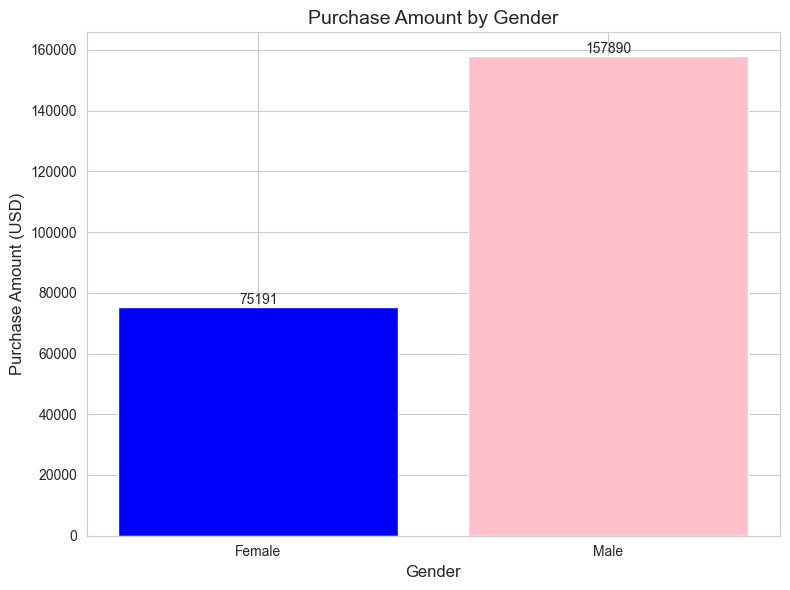

In [193]:
gender_group = shop_group.groupby('Gender').sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_group['Gender'], gender_group['Purchase Amount (USD)'], color=['blue', 'pink'])

# Add the purchase amounts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position of the text (middle of the bar)
        yval + 5,  # y position of the text (above the bar)
        f'{yval:.0f}',  # Purchase amount value
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

# Customize the plot
plt.title('Purchase Amount by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [194]:
data =shop[ 'Season']. value_counts()
data

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

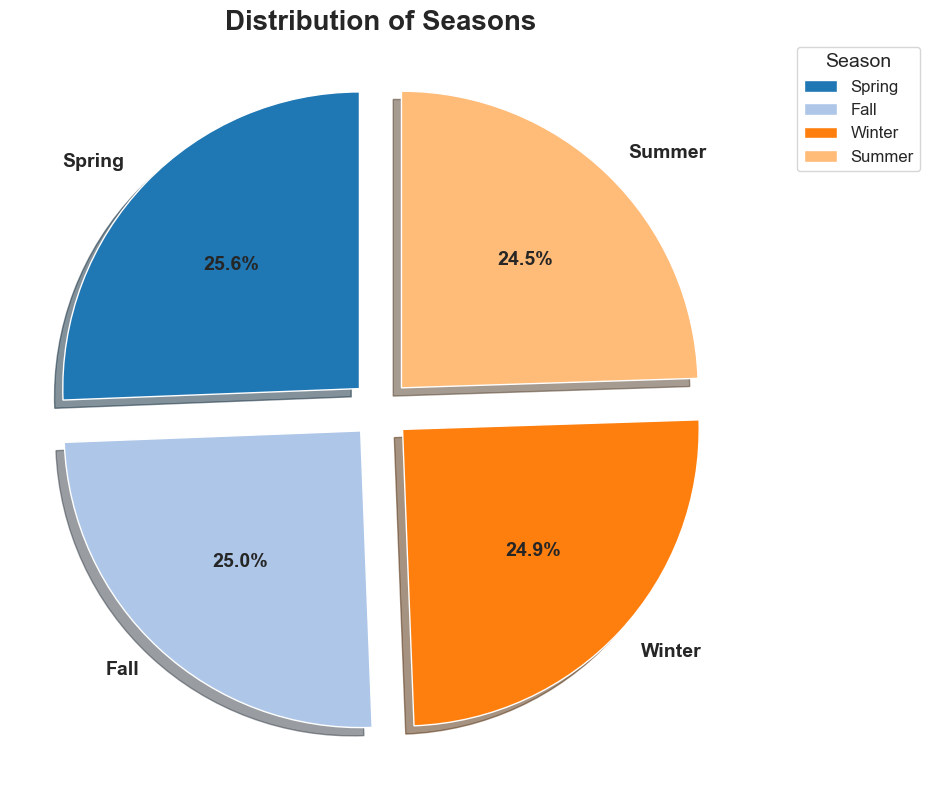

In [195]:

data = shop['Season'].value_counts() 
explode = [0.1] * len(data) 


plt.figure(figsize=(12, 8))  
data.plot(
    kind='pie',
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,  
    shadow=True,  
    colors=plt.cm.tab20.colors,  
    textprops={'fontsize': 14, 'weight': 'bold'},  
)

plt.title('Distribution of Seasons', fontsize=20, weight='bold') 
plt.ylabel('') 
plt.legend(
    data.index,
    title='Season',
    title_fontsize=14,  
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.05, 1), 
)
plt.tight_layout()  
plt.show()


Distribution of Seasons (Spring, Winter, Fall, Summer)

In [196]:
shop["Subscription Status"].unique()

array(['Yes', 'No'], dtype=object)

/var/folders/13/hn928rk510z3wmwg7rhmbd8h0000gn/T/ipykernel_50397/1388575930.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/13/hn928rk510z3wmwg7rhmbd8h0000gn/T/ipykernel_50397/1388575930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


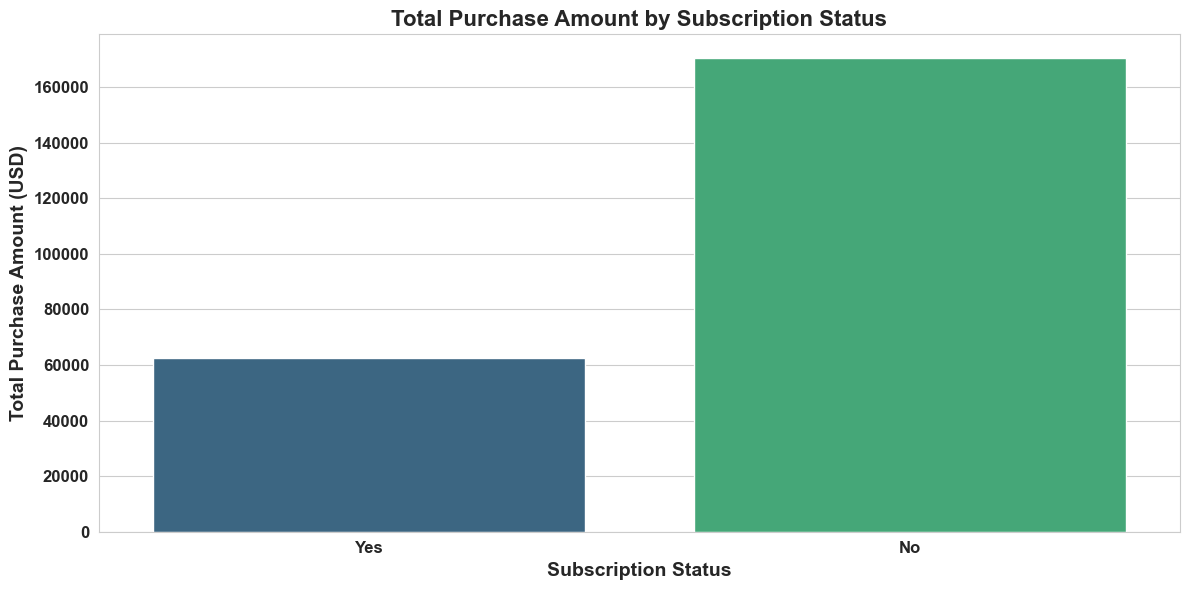

In [197]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))  
sns.barplot(
    data=shop, 
    x='Subscription Status', 
    y='Purchase Amount (USD)', 
    estimator=sum, 
    ci=None, 
    palette='viridis' 
)

# Add labels and title
plt.title('Total Purchase Amount by Subscription Status', fontsize=16, weight='bold')
plt.xlabel('Subscription Status', fontsize=14, weight='bold')
plt.ylabel('Total Purchase Amount (USD)', fontsize=14, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')


plt.tight_layout()
plt.show()

Number of Purchase Amount by Subscription Status

In [198]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

/var/folders/13/hn928rk510z3wmwg7rhmbd8h0000gn/T/ipykernel_50397/3997402444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


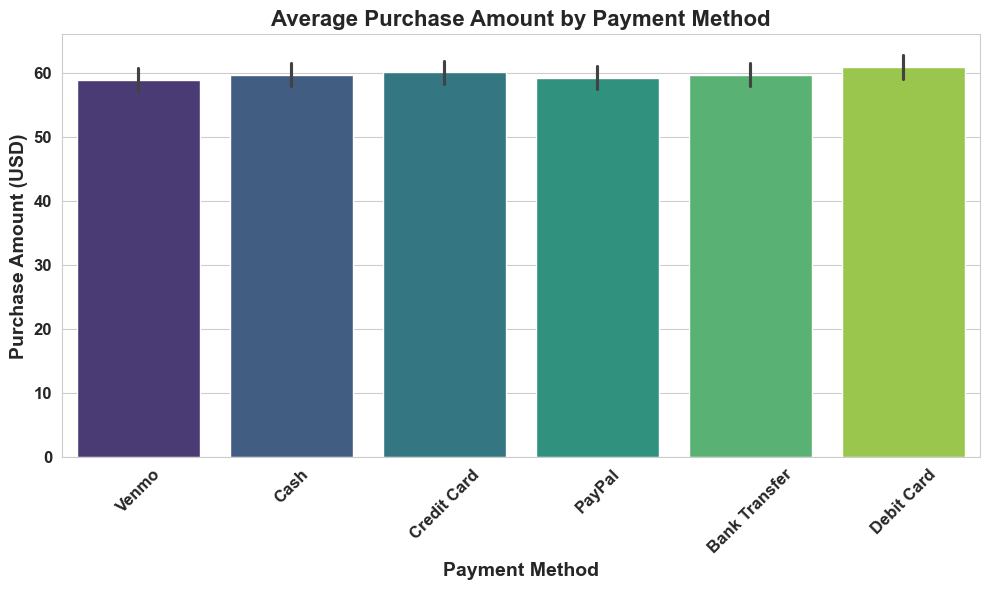

In [199]:
plt.figure(figsize=(10, 6))  
sns.barplot(
    x="Payment Method", 
    y="Purchase Amount (USD)", 
    data=shop, 
    palette="viridis"
)

plt.title("Average Purchase Amount by Payment Method", fontsize=16, weight='bold')
plt.xlabel("Payment Method", fontsize=14, weight='bold')
plt.ylabel("Purchase Amount (USD)", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12, weight='bold') 
plt.yticks(fontsize=12, weight='bold')


plt.tight_layout()
plt.show()

In [200]:
num_fea = shop[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
num_fea.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [201]:
cor_mat = num_fea.corr()
cor_mat

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


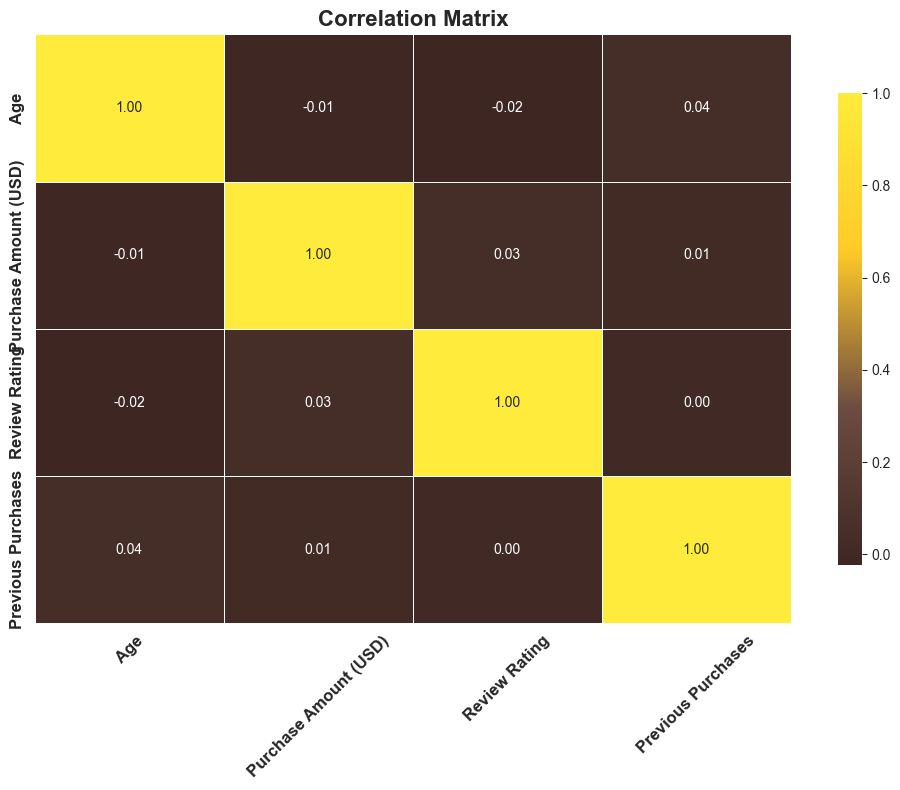

In [202]:
import matplotlib.colors as mcolors


colors = ["#3E2723", "#6D4C41", "#FFCA28", "#FFEB3B"] 
cmap = mcolors.LinearSegmentedColormap.from_list("brown_yellow", colors)


plt.figure(figsize=(10, 8))
sns.heatmap(
    cor_mat, 
    annot=True, 
    cmap=cmap, 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8},
)


plt.title("Correlation Matrix", fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45, weight='bold') 
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout() 
plt.show()

Correlation Matrix of Variables (Age, Income, Purchase Amount, Gender, Product Category, Season)

/var/folders/13/hn928rk510z3wmwg7rhmbd8h0000gn/T/ipykernel_50397/3774293364.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = shop.groupby(['Gender', 'Age_category']).agg({'Purchase Amount (USD)': 'sum'}).reset_index()


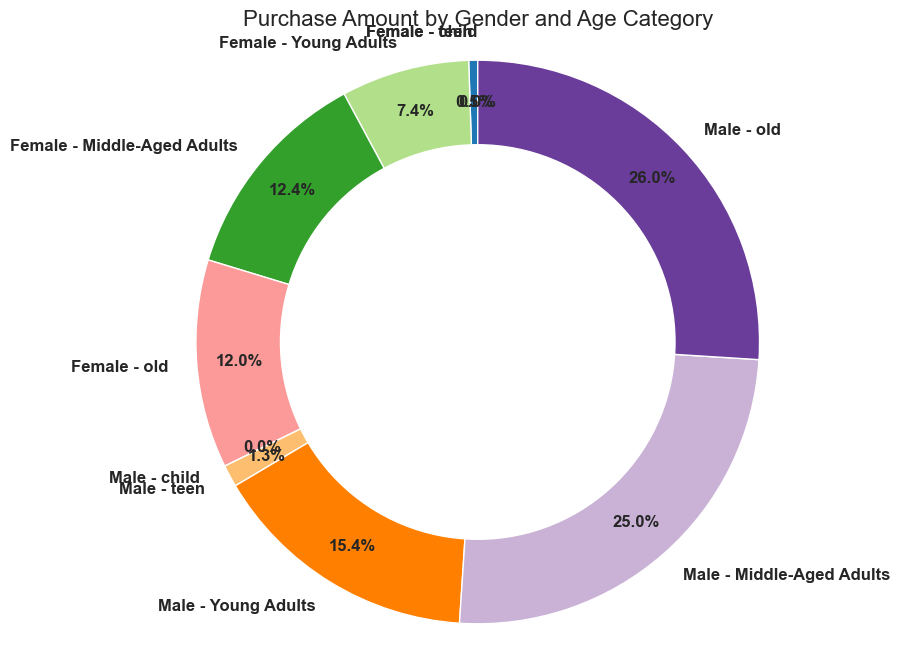

In [203]:



aggregated_data = shop.groupby(['Gender', 'Age_category']).agg({'Purchase Amount (USD)': 'sum'}).reset_index()

labels = [f'{row["Gender"]} - {row["Age_category"]}' for _, row in aggregated_data.iterrows()]
sizes = aggregated_data['Purchase Amount (USD)']


plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors[:len(sizes)],
    pctdistance=0.85, 
    labeldistance=1.1, 
    textprops={'fontsize': 12, 'weight': 'bold'} 
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)


plt.title('Purchase Amount by Gender and Age Category', fontsize=16)

plt.axis('equal') 
plt.show()


Purchase Amount by. Gender and Age Category